This notebook serves as our first attempt to "order" our objects based on their location in ICA space.  It is based on the orientation of the t-SNE projection seen at [physics.drexel.edu/~trevormccafferey/](http://physics.drexel.edu/~tmccafferey/interactive_VLA2018b_size_and_uniform) (4/2/2020)

In [218]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import astropy
from astropy.io import fits
from astropy.table import Table
import richardsplot
import sklearn
from sklearn.manifold import TSNE
import sys
%matplotlib inline

In [219]:
infile = 'Trevors_finalFigs_ICA.csv'
df = pd.read_csv(infile)

Q = df[['Quadrant']].values
Q0 = (Q == 0) #red
Q1 = (Q == 1) #blue
Q2 = (Q == 2) #orange
Q3 = (Q == 3) #yellow
Q4 = (Q == 4) #black

In [220]:
#Load the ICA weights from Paul's 6-component fitting (now for DR7)
infile = 'PGv2_DR7_data/grdr7_180126.weights'
infoHewett = pd.read_csv(infile, sep = ' ', names=["name", "redshift", "W1", "W2", "W3", "W4", "W5", "W6"])
weights = infoHewett[infoHewett.columns[2:]]
#print weights
X = np.array(weights)
W1 = X[:,0]
W2 = X[:,1]
W3 = X[:,2]
W4 = X[:,3]
W5 = X[:,4]
W6 = X[:,5]

infile2 = 'PGv2_DR7_data/grdr7_Shen2011_targ_uni.csv'
infoShen = pd.read_csv(infile2, skiprows=1, names=["name","RAx","DECx","SDSSNAME","RA","DEC","redshift","TARG_FLAG","UNI_FLAG","COLOR_FLAG","MIZ2","BALFLAGShen","FIRSTFRTYPE","FINTREST6CM","LOGFNU2500","R6CM2500A","LOGL3000","LOGL1350","Separation"])

In [221]:
projTSNE2 = np.load("projTSNE2.npy") #use the saved projection to maintain orientation

In [222]:
# Find radius of circle containing 20% of the sources and plot
x0 = 0 #take center of circle to be 0,0
y0 = 0
x  = projTSNE2[:,0]
y  = projTSNE2[:,1]
# Find radial coordinate of each point
r  = np.sqrt((x - x0)**2 + (y - y0)**2)
t  = 20 # percent
# Find radius that corresponds to t percentile
r0 = np.percentile(r, t)

cMask = np.array(infoShen['COLOR_FLAG'])
zem = np.array(infoHewett['redshift'])
zmask = ((zem<=1.75))
R = np.array(infoShen['R6CM2500A']).astype(float)
FIRST = np.array(infoShen['FINTREST6CM']).astype(float)
RLmask = (R>10)

projTSNE2rad = projTSNE2[RLmask]
zmask = ((zem>1.645)&(zem<=1.6519))

/Users/trevormccaffrey/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in greater


50


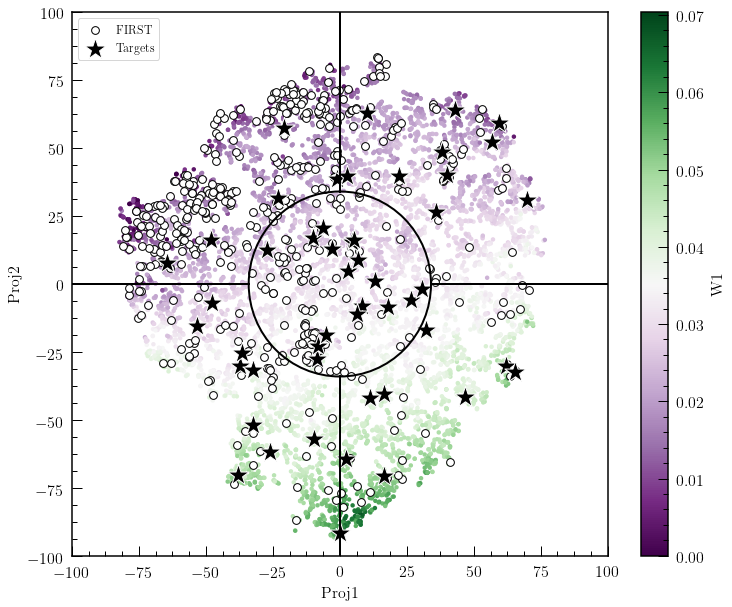

In [240]:
plt.figure(figsize=(12,10))

projTSNE2col = projTSNE2[cMask>0]
projTSNE2radcol = projTSNE2[(cMask>0)&(RLmask)]
projTSNE2colz = projTSNE2[(cMask>0)&(zmask)]
print(len(projTSNE2colz))

#Test different weights
plt.scatter(projTSNE2col[:,0], projTSNE2col[:,1], c=W1[cMask>0], cmap="PRGn", edgecolor="None", s=20)
plt.xlabel("Proj1")
plt.ylabel("Proj2")
cbar = plt.colorbar()
cbar.ax.set_ylabel('W1')
plt.scatter(projTSNE2radcol[:,0], projTSNE2radcol[:,1], c='w', edgecolor='k', s=60, label="FIRST")
plt.scatter(projTSNE2colz[:,0], projTSNE2colz[:,1], c='k', edgecolor='w', s=500, marker='*', label="Targets")
plt.xlabel("Proj1")
plt.xlim(-100,100)
plt.ylim(-100,100)
plt.legend(loc="upper left")

circle=plt.Circle((0, 0), r0, color='k', fill=False, linewidth=2)
fig = plt.gcf()
fig.gca().add_artist(circle)

plt.plot([0,0], [r0,100], c='k', linewidth=2)
plt.plot([0,0], [-r0,-100], c='k', linewidth=2)
plt.plot([r0,100], [0,0], c='k', linewidth=2)
plt.plot([-r0,-100], [0,0], c='k', linewidth=2)
#plt.savefig('Graphs/ICA_ordering/newPGtargets.png')

* While there are no obvious trends regarding our targets right now, the FIRST population is much denser in Q2 (upper-left).  Can compare the graph above with [Bokeh plots](http://physics.drexel.edu/~tmccafferey/interactive_VLA2018b_size_and_uniform) easily since the orientations are the same.

* Lowest target in Q4

---

#### Now we can do the same sort of analysis as before, but ordering subsamples based on the quadrant they occupy in the above space

In [224]:
infile = 'SpringFinalFigs_moreParams.csv'
df = pd.read_csv(infile)

#Parameters to test
uniform = df[['UNI_FLAG']].values
Miz2 = df[['MI_Z2']].values
det = df[['detection']].values
peak_flux = df[['peak_flux']].values
int_flux = np.log10(df[['int_flux']].values)
logL_rad = df[['L_rad']].values
aro = df[['alpha_ro']].values
ew_civ = df[['EW_CIV_2']].values
voff_civ = df[['VOFF_CIV_PEAK_2']].values
log_bh = df[['LOGBH']].values
logedd_ratio = df[['LOGEDD_RATIO']].values
logL_bol = df[['LOGLBOL']].values
logL_civ = df[['LOGL_CIV']].values
fwhm_civ = df[['FWHM_CIV']].values

Num Q0 = 17
Num Q1 = 10
Num Q2 = 5
Num Q3 = 9
Num Q4 = 9


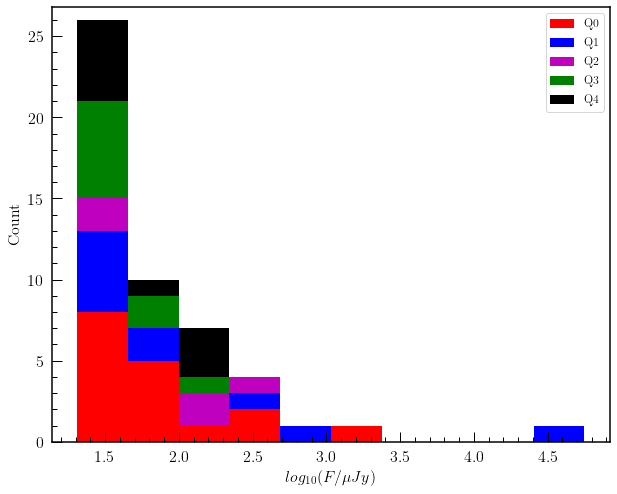

In [244]:
plt.figure(figsize=(10,8))
plt.hist([int_flux[Q0], int_flux[Q1], int_flux[Q2], int_flux[Q3], int_flux[Q4]], color=['r', 'b', 'm', 'g', 'k'], 
                  stacked=True, label=["Q0", "Q1", "Q2", "Q3", "Q4"])
plt.xlabel('$log_{10} (F / {\mu Jy})$')
plt.ylabel('Count')
plt.ylim(0, 26.8)
plt.legend(loc="best")

print("Num Q0 =", (Q0).sum())
print("Num Q1 =", (Q1).sum())
print("Num Q2 =", (Q2).sum())
print("Num Q3 =", (Q3).sum())
print("Num Q4 =", (Q4).sum())
#plt.savefig('Graphs/ICA_Ordering/radioflux_quadrantdist.png')

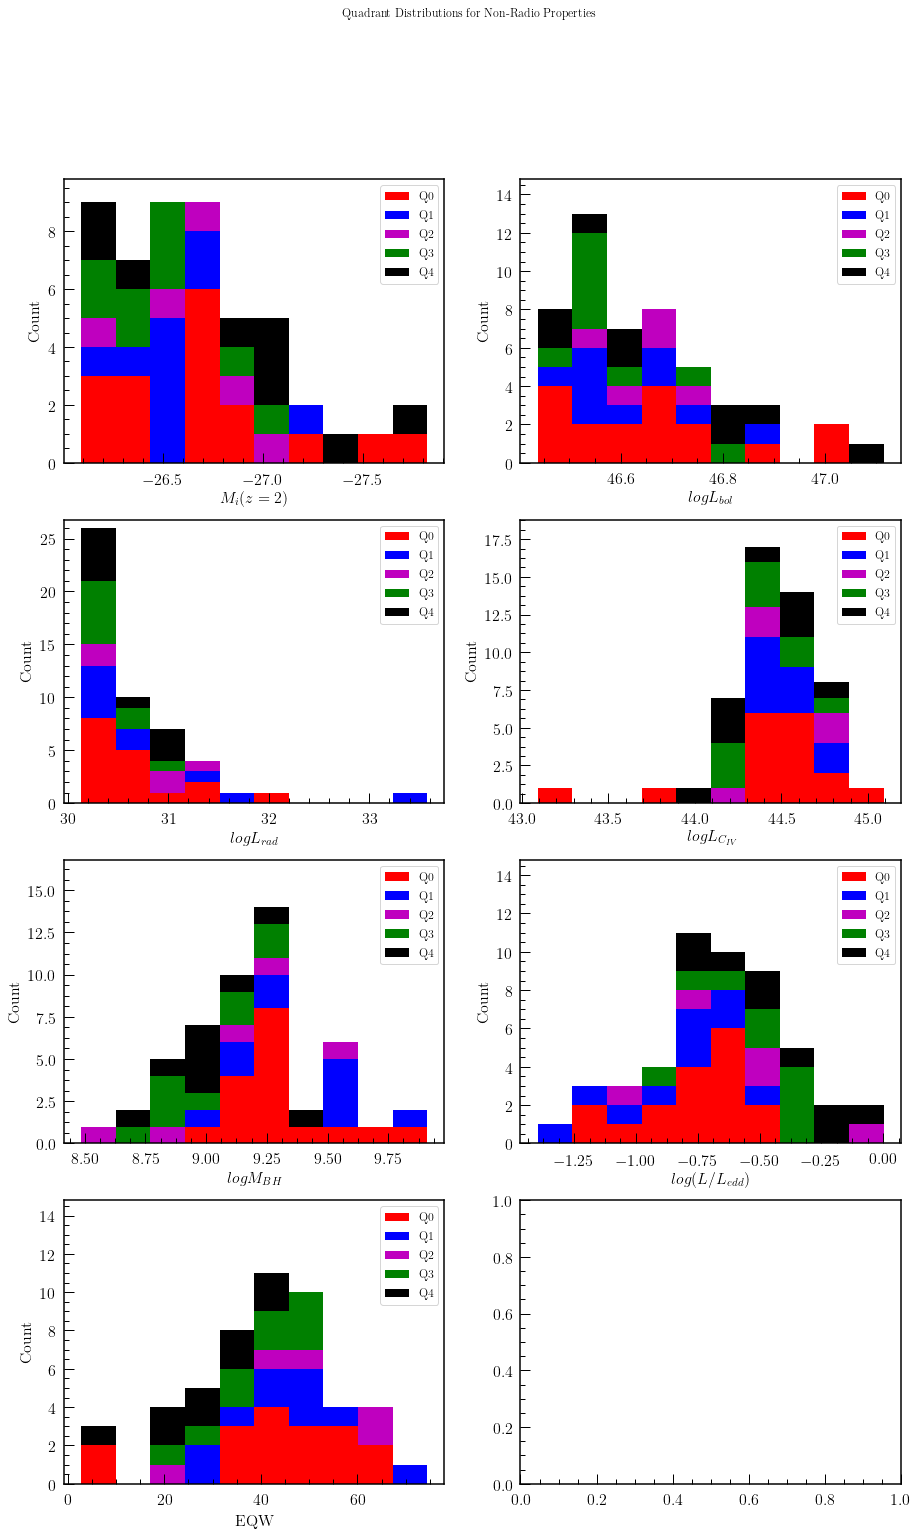

In [246]:
fig, axs = plt.subplots(4, 2, figsize=(15,24))

axs[0,0].hist([Miz2[Q0], Miz2[Q1], Miz2[Q2], Miz2[Q3], Miz2[Q4]], color=['r', 'b', 'm', 'g', 'k'], 
                  stacked=True, label=["Q0", "Q1", "Q2", "Q3", "Q4"])
axs[0,0].set_xlabel('$M_i(z=2)$')
axs[0,0].invert_xaxis()
axs[0,0].set_ylabel('Count')
axs[0,0].set_ylim(0, 9.8)
axs[0,0].legend(loc="best")

axs[0,1].hist([logL_bol[Q0], logL_bol[Q1], logL_bol[Q2], logL_bol[Q3], logL_bol[Q4]], color=['r', 'b', 'm', 'g', 'k'], 
                  stacked=True, label=["Q0", "Q1", "Q2", "Q3", "Q4"])
axs[0,1].set_xlabel('$log L_{bol}$')
axs[0,1].set_ylabel('Count')
axs[0,1].set_ylim(0, 14.8)
axs[0,1].legend(loc="best")

axs[1,0].hist([logL_rad[Q0], logL_rad[Q1], logL_rad[Q2], logL_rad[Q3], logL_rad[Q4]], color=['r', 'b', 'm', 'g', 'k'], 
                  stacked=True, label=["Q0", "Q1", "Q2", "Q3", "Q4"])
axs[1,0].set_xlabel('$log L_{rad}$')
axs[1,0].set_ylabel('Count')
axs[1,0].set_ylim(0, 26.8)
axs[1,0].legend(loc="best")

axs[1,1].hist([logL_civ[Q0], logL_civ[Q1], logL_civ[Q2], logL_civ[Q3], logL_civ[Q4]], color=['r', 'b', 'm', 'g', 'k'], 
                  stacked=True, label=["Q0", "Q1", "Q2", "Q3", "Q4"])
axs[1,1].set_xlabel('$log L_{C_{IV}}$')
axs[1,1].set_ylabel('Count')
axs[1,1].set_ylim(0, 18.8)
axs[1,1].legend(loc="best")

axs[2,0].hist([log_bh[Q0], log_bh[Q1], log_bh[Q2], log_bh[Q3], log_bh[Q4]], color=['r', 'b', 'm', 'g', 'k'], 
                  stacked=True, label=["Q0", "Q1", "Q2", "Q3", "Q4"])
axs[2,0].set_xlabel('$log M_{BH}$')
axs[2,0].set_ylabel('Count')
axs[2,0].set_ylim(0, 16.8)
axs[2,0].legend(loc="best")

axs[2,1].hist([logedd_ratio[Q0], logedd_ratio[Q1], logedd_ratio[Q2], logedd_ratio[Q3], logedd_ratio[Q4]], color=['r', 'b', 'm', 'g', 'k'], 
                  stacked=True, label=["Q0", "Q1", "Q2", "Q3", "Q4"])
axs[2,1].set_xlabel('$log (L/L_{edd})$')
axs[2,1].set_ylabel('Count')
axs[2,1].set_ylim(0, 14.8)
axs[2,1].legend(loc="best")

axs[3,0].hist([ew_civ[Q0], ew_civ[Q1], ew_civ[Q2], ew_civ[Q3], ew_civ[Q4]], color=['r', 'b', 'm', 'g', 'k'], 
                  stacked=True, label=["Q0", "Q1", "Q2", "Q3", "Q4"])
axs[3,0].set_xlabel('EQW')
axs[3,0].set_ylabel('Count')
axs[3,0].set_ylim(0, 14.8)
axs[3,0].legend(loc="best")

plt.suptitle('Quadrant Distributions for Non-Radio Properties')
#mplt.savefig('Graphs/ICA_Ordering/quadrant_demographics.png')

The quadrant counts are nicely distributed among parameters

---

### $log(M_{BH}), log(L/L_{edd}), M_i(z=2), log(L_{bol})$ related to radio properties

Reminder: $\alpha_{ro}$ is calculated using the following equation from Eq. 4 of Stone & Richards 2019:

 $\alpha_{ro} = \frac{log(L_{20cm}/L_{2500Å})}{log(20cm / 2500Å)}$

In [227]:
#For now, only testing detections
Q0d = (Q == 0)&(det>0) #red
Q1d = (Q == 1)&(det>0) #blue
Q2d = (Q == 2)&(det>0) #magenta
Q3d = (Q == 3)&(det>0) #yellow
Q4d = (Q == 4)&(det>0) #black

Q0nd = (Q == 0)&(det<0) 
Q1nd = (Q == 1)&(det<0) 
Q2nd = (Q == 2)&(det<0) 
Q3nd = (Q == 3)&(det<0) 
Q4nd = (Q == 4)&(det<0)

In [228]:
Q0nd.sum()

9

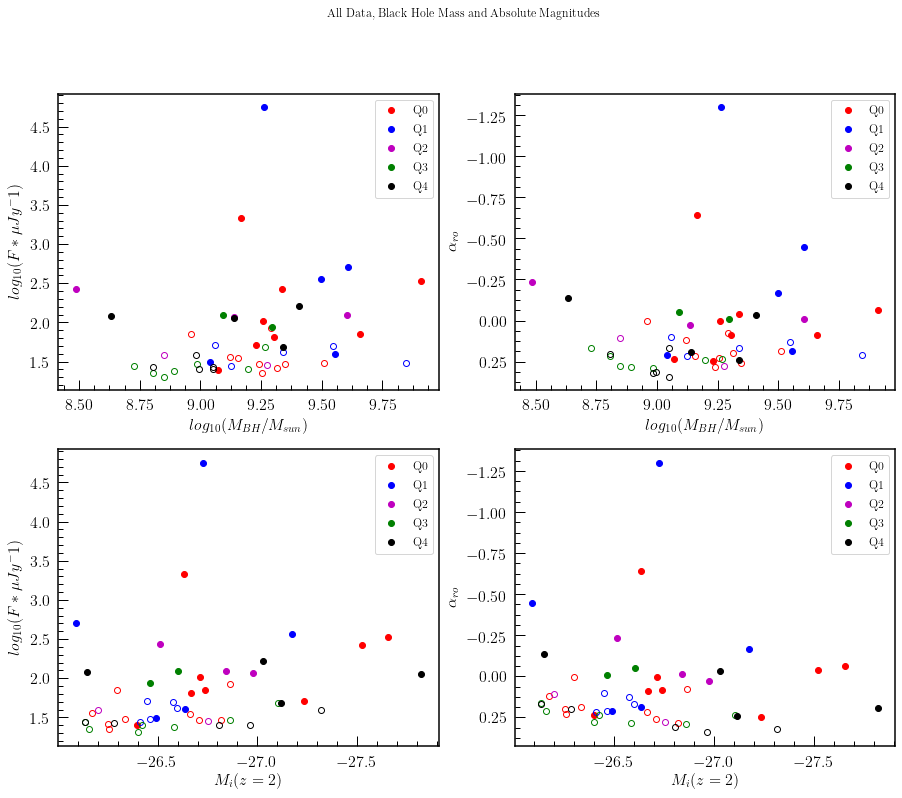

In [271]:
fig, axs = plt.subplots(2, 2, figsize=(15,12))

axs[0,0].plot(log_bh[Q0d], int_flux[Q0d], 'ro', label="Q0")
axs[0,0].plot(log_bh[Q0nd], int_flux[Q0nd], 'ro', markerfacecolor="None")
axs[0,0].plot(log_bh[Q1d], int_flux[Q1d], 'bo', label="Q1")
axs[0,0].plot(log_bh[Q1nd], int_flux[Q1nd], 'bo', markerfacecolor="None")
axs[0,0].plot(log_bh[Q2d], int_flux[Q2d], 'mo', label="Q2")
axs[0,0].plot(log_bh[Q2nd], int_flux[Q2nd], 'mo', markerfacecolor="None")
axs[0,0].plot(log_bh[Q3d], int_flux[Q3d], 'go', label="Q3")
axs[0,0].plot(log_bh[Q3nd], int_flux[Q3nd], 'go', markerfacecolor="None")
axs[0,0].plot(log_bh[Q4d], int_flux[Q4d], 'ko', label="Q4")
axs[0,0].plot(log_bh[Q4nd], int_flux[Q4nd], 'ko', markerfacecolor="None")
#axs[0,0].set_ylim(1,3)
axs[0,0].set_xlabel("$log_{10} (M_{BH} / M_{sun})$")
axs[0,0].set_ylabel('$log_{10} (F * {\mu Jy}^-1)$')
axs[0,0].legend(loc="best")

axs[0,1].plot(log_bh[Q0d], aro[Q0d], 'ro', label="Q0")
axs[0,1].plot(log_bh[Q0nd], aro[Q0nd], 'ro', markerfacecolor="None")
axs[0,1].plot(log_bh[Q1d], aro[Q1d], 'bo', label="Q1")
axs[0,1].plot(log_bh[Q1nd], aro[Q1nd], 'bo', markerfacecolor="None")
axs[0,1].plot(log_bh[Q2d], aro[Q2d], 'mo', label="Q2")
axs[0,1].plot(log_bh[Q2nd], aro[Q2nd], 'mo', markerfacecolor="None")
axs[0,1].plot(log_bh[Q3d], aro[Q3d], 'go', label="Q3")
axs[0,1].plot(log_bh[Q3nd], aro[Q3nd], 'go', markerfacecolor="None")
axs[0,1].plot(log_bh[Q4d], aro[Q4d], 'ko', label="Q4")
axs[0,1].plot(log_bh[Q4nd], aro[Q4nd], 'ko', markerfacecolor="None")
#axs[0,1].set_ylim(1,3)
axs[0,1].set_xlabel("$log_{10} (M_{BH} / M_{sun})$")
axs[0,1].set_ylabel('$\\alpha_{ro}$')
axs[0,1].invert_yaxis()
axs[0,1].legend(loc="best")

axs[1,0].plot(Miz2[Q0d], int_flux[Q0d], 'ro', label="Q0")
axs[1,0].plot(Miz2[Q0nd], int_flux[Q0nd], 'ro', markerfacecolor="None")
axs[1,0].plot(Miz2[Q1d], int_flux[Q1d], 'bo', label="Q1")
axs[1,0].plot(Miz2[Q1nd], int_flux[Q1nd], 'bo', markerfacecolor="None")
axs[1,0].plot(Miz2[Q2d], int_flux[Q2d], 'mo', label="Q2")
axs[1,0].plot(Miz2[Q2nd], int_flux[Q2nd], 'mo', markerfacecolor="None")
axs[1,0].plot(Miz2[Q3d], int_flux[Q3d], 'go', label="Q3")
axs[1,0].plot(Miz2[Q3nd], int_flux[Q3nd], 'go', markerfacecolor="None")
axs[1,0].plot(Miz2[Q4d], int_flux[Q4d], 'ko', label="Q4")
axs[1,0].plot(Miz2[Q4nd], int_flux[Q4nd], 'ko', markerfacecolor="None")
#axs[1,0].set_ylim(1,3)
axs[1,0].set_xlabel("$M_i(z=2)$")
axs[1,0].set_ylabel('$log_{10} (F * {\mu Jy}^-1)$')
axs[1,0].invert_xaxis()
axs[1,0].legend(loc="best")

axs[1,1].plot(Miz2[Q0d], aro[Q0d], 'ro', label="Q0")
axs[1,1].plot(Miz2[Q0nd], aro[Q0nd], 'ro', markerfacecolor="None")
axs[1,1].plot(Miz2[Q1d], aro[Q1d], 'bo', label="Q1")
axs[1,1].plot(Miz2[Q1nd], aro[Q1nd], 'bo', markerfacecolor="None")
axs[1,1].plot(Miz2[Q2d], aro[Q2d], 'mo', label="Q2")
axs[1,1].plot(Miz2[Q2nd], aro[Q2nd], 'mo', markerfacecolor="None")
axs[1,1].plot(Miz2[Q3d], aro[Q3d], 'go', label="Q3")
axs[1,1].plot(Miz2[Q3nd], aro[Q3nd], 'go', markerfacecolor="None")
axs[1,1].plot(Miz2[Q4d], aro[Q4d], 'ko', label="Q4")
axs[1,1].plot(Miz2[Q4nd], aro[Q4nd], 'ko', markerfacecolor="None")
#axs[1,1].set_ylim(1,3)
axs[1,1].set_xlabel("$M_i(z=2)$")
axs[1,1].set_ylabel('$\\alpha_{ro}$')
axs[1,1].invert_xaxis()
axs[1,1].invert_yaxis()
axs[1,1].legend(loc="best")

plt.suptitle("All Data, Black Hole Mass and Absolute Magnitudes")
plt.savefig("Graphs/ICA_Ordering/all_data/flux_vs_bhmass_and_mag.png")

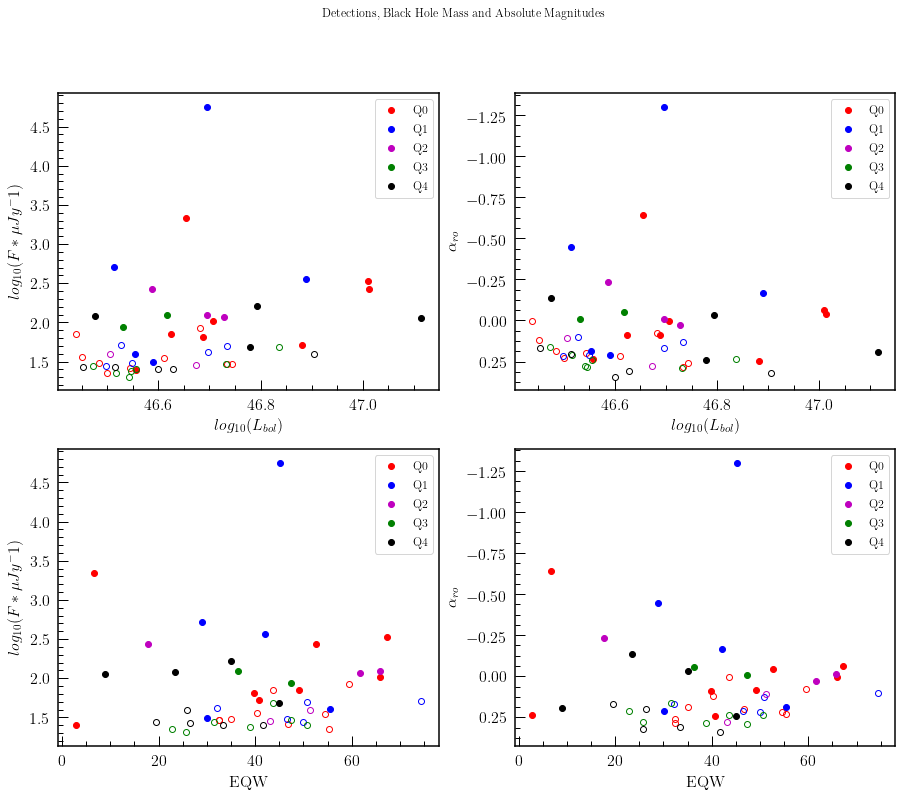

In [272]:
fig, axs = plt.subplots(2, 2, figsize=(15,12))

axs[0,0].plot(logL_bol[Q0d], int_flux[Q0d], 'ro', label="Q0")
axs[0,0].plot(logL_bol[Q0nd], int_flux[Q0nd], 'ro', markerfacecolor="None")
axs[0,0].plot(logL_bol[Q1d], int_flux[Q1d], 'bo', label="Q1")
axs[0,0].plot(logL_bol[Q1nd], int_flux[Q1nd], 'bo', markerfacecolor="None")
axs[0,0].plot(logL_bol[Q2d], int_flux[Q2d], 'mo', label="Q2")
axs[0,0].plot(logL_bol[Q2nd], int_flux[Q2nd], 'mo', markerfacecolor="None")
axs[0,0].plot(logL_bol[Q3d], int_flux[Q3d], 'go', label="Q3")
axs[0,0].plot(logL_bol[Q3nd], int_flux[Q3nd], 'go', markerfacecolor="None")
axs[0,0].plot(logL_bol[Q4d], int_flux[Q4d], 'ko', label="Q4")
axs[0,0].plot(logL_bol[Q4nd], int_flux[Q4nd], 'ko', markerfacecolor="None")
#axs[0,0].set_ylim(1,3)
axs[0,0].set_xlabel("$log_{10} (L_{bol})$")
axs[0,0].set_ylabel('$log_{10} (F * {\mu Jy}^-1)$')
axs[0,0].legend(loc="best")

axs[0,1].plot(logL_bol[Q0d], aro[Q0d], 'ro', label="Q0")
axs[0,1].plot(logL_bol[Q0nd], aro[Q0nd], 'ro', markerfacecolor="None")
axs[0,1].plot(logL_bol[Q1d], aro[Q1d], 'bo', label="Q1")
axs[0,1].plot(logL_bol[Q1nd], aro[Q1nd], 'bo', markerfacecolor="None")
axs[0,1].plot(logL_bol[Q2d], aro[Q2d], 'mo', label="Q2")
axs[0,1].plot(logL_bol[Q2nd], aro[Q2nd], 'mo', markerfacecolor="None")
axs[0,1].plot(logL_bol[Q3d], aro[Q3d], 'go', label="Q3")
axs[0,1].plot(logL_bol[Q3nd], aro[Q3nd], 'go', markerfacecolor="None")
axs[0,1].plot(logL_bol[Q4d], aro[Q4d], 'ko', label="Q4")
axs[0,1].plot(logL_bol[Q4nd], aro[Q4nd], 'ko', markerfacecolor="None")
#axs[0,1].set_ylim(1,3)
axs[0,1].set_xlabel("$log_{10} (L_{bol})$")
axs[0,1].set_ylabel('$\\alpha_{ro}$')
axs[0,1].invert_yaxis()
axs[0,1].legend(loc="best")

axs[1,0].plot(ew_civ[Q0d], int_flux[Q0d], 'ro', label="Q0")
axs[1,0].plot(ew_civ[Q0nd], int_flux[Q0nd], 'ro', markerfacecolor="None")
axs[1,0].plot(ew_civ[Q1d], int_flux[Q1d], 'bo', label="Q1")
axs[1,0].plot(ew_civ[Q1nd], int_flux[Q1nd], 'bo', markerfacecolor="None")
axs[1,0].plot(ew_civ[Q2d], int_flux[Q2d], 'mo', label="Q2")
axs[1,0].plot(ew_civ[Q2nd], int_flux[Q2nd], 'mo', markerfacecolor="None")
axs[1,0].plot(ew_civ[Q3d], int_flux[Q3d], 'go', label="Q3")
axs[1,0].plot(ew_civ[Q3nd], int_flux[Q3nd], 'go', markerfacecolor="None")
axs[1,0].plot(ew_civ[Q4d], int_flux[Q4d], 'ko', label="Q4")
axs[1,0].plot(ew_civ[Q4nd], int_flux[Q4nd], 'ko', markerfacecolor="None")
#axs[1,0].set_ylim(1,3)
axs[1,0].set_xlabel("EQW")
axs[1,0].set_ylabel('$log_{10} (F * {\mu Jy}^-1)$')
axs[1,0].legend(loc="best")

axs[1,1].plot(ew_civ[Q0d], aro[Q0d], 'ro', label="Q0")
axs[1,1].plot(ew_civ[Q0nd], aro[Q0nd], 'ro', markerfacecolor="None")
axs[1,1].plot(ew_civ[Q1d], aro[Q1d], 'bo', label="Q1")
axs[1,1].plot(ew_civ[Q1nd], aro[Q1nd], 'bo', markerfacecolor="None")
axs[1,1].plot(ew_civ[Q2d], aro[Q2d], 'mo', label="Q2")
axs[1,1].plot(ew_civ[Q2nd], aro[Q2nd], 'mo', markerfacecolor="None")
axs[1,1].plot(ew_civ[Q3d], aro[Q3d], 'go', label="Q3")
axs[1,1].plot(ew_civ[Q3nd], aro[Q3nd], 'go', markerfacecolor="None")
axs[1,1].plot(ew_civ[Q4d], aro[Q4d], 'ko', label="Q4")
axs[1,1].plot(ew_civ[Q4nd], aro[Q4nd], 'ko', markerfacecolor="None")
#axs[1,1].set_ylim(1,3)
axs[1,1].set_xlabel("EQW")
axs[1,1].set_ylabel('$\\alpha_{ro}$')
axs[1,1].invert_yaxis()
axs[1,1].legend(loc="best")

plt.suptitle("Detections, Black Hole Mass and Absolute Magnitudes")
#plt.savefig("Graphs/ICA_Ordering/all_data/quadrant_radio_vs_Lbol_and_eqw.png")

---
#### 1d analysis in $C_{IV}$ space

(0, 2)


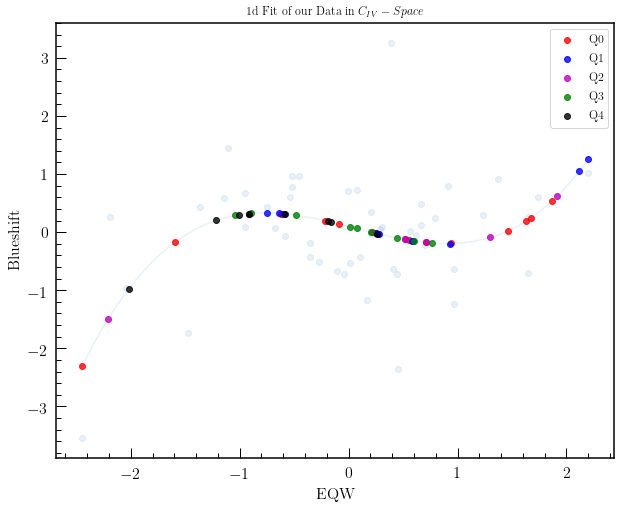

In [252]:
from sklearn.preprocessing import scale

Xsort = df[['EW_CIV_2','VOFF_CIV_PEAK_2']].values

x = scale(Xsort[:,0])
y = scale(Xsort[:,1])
z = np.arange(min(x),max(x),0.001)
fit = np.poly1d(np.polyfit(x,y,3))

#Now manually do the 1-d fit for the cubic line
cubefit = np.array([z, fit(z)]).T
data = np.array([x, y]).T

trevorFit = np.array([]).reshape(0, 2)
print(trevorFit.shape)

#Want to loop through each point of the cubic fit
#for each data point, saving the distance between the two
#in delta.  Then take the index of the min in delta and
#plot that index of the cubic fit to display the 1d distribution
for scat in data: 
    r = np.sqrt((scat[0]-cubefit[:,0])**2 + (scat[1]-cubefit[:,1])**2)
    delta = np.array([cubefit[np.argmin(r), 0], cubefit[np.argmin(r), 1]])
    trevorFit = np.concatenate((trevorFit, np.atleast_2d(delta)))

fitx = np.reshape(trevorFit[:,0], (50,1))
fity = np.reshape(trevorFit[:,1], (50,1))

fill = 0.8
plt.figure(figsize=(10,8))
plt.scatter(x, y, alpha=0.1)
plt.plot(fitx[Q0d|Q0nd], fity[Q0d|Q0nd], 'ro', label="Q0", alpha=fill)
plt.plot(fitx[Q1d|Q1nd], fity[Q1d|Q1nd], 'bo', label="Q1", alpha=fill)
plt.plot(fitx[Q2d|Q2nd], fity[Q2d|Q2nd], 'mo', label="Q2", alpha=fill)
plt.plot(fitx[Q3d|Q3nd], fity[Q3d|Q3nd], 'go', label="Q3", alpha=fill)
plt.plot(fitx[Q4d|Q4nd], fity[Q4d|Q4nd], 'ko', label="Q4", alpha=fill)
plt.plot(z, fit(z), alpha=0.1)
plt.xlabel('EQW')
plt.ylabel('Blueshift')
plt.legend(loc="best")

plt.title("1d Fit of our Data in $C_{IV}-Space$")
#plt.savefig("Graphs/ICA_Ordering/quadrant_civ_1dfit.png")

---

### Now do the same analysis, but with detections only

Num Detections Q0 = 8
Num Detections Q1 = 5
Num Detections Q2 = 3
Num Detections Q3 = 2
Num Detections Q4 = 4


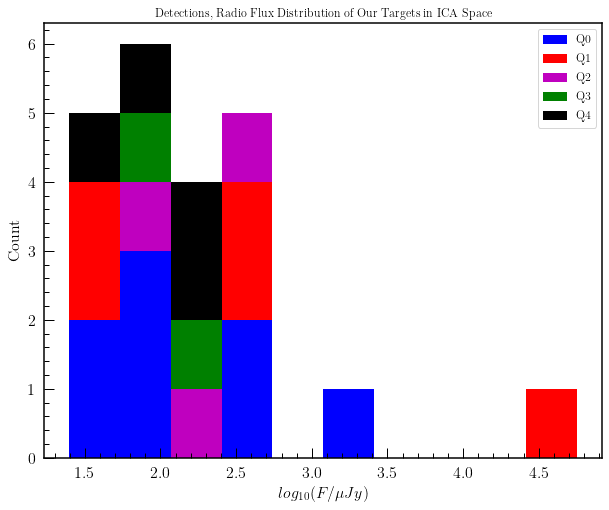

In [253]:
plt.figure(figsize=(10,8))
plt.hist([int_flux[Q0d], int_flux[Q1d], int_flux[Q2d], int_flux[Q3d], int_flux[Q4d]], stacked=True, color=['b', 'r', 'm', 'g', 'k'], label=['Q0', 'Q1', 'Q2', 'Q3', 'Q4'])
plt.xlabel('$log_{10} (F / {\mu Jy})$')
plt.ylabel('Count')
plt.title('Detections, Radio Flux Distribution of Our Targets in ICA Space')
plt.legend(loc="best")

print("Num Detections Q0 =", (Q0d).sum())
print("Num Detections Q1 =", (Q1d).sum())
print("Num Detections Q2 =", (Q2d).sum())
print("Num Detections Q3 =", (Q3d).sum())
print("Num Detections Q4 =", (Q4d).sum())
#plt.savefig("Graphs/ICA_Ordering/quadrant_detectionflux_distribution.png")

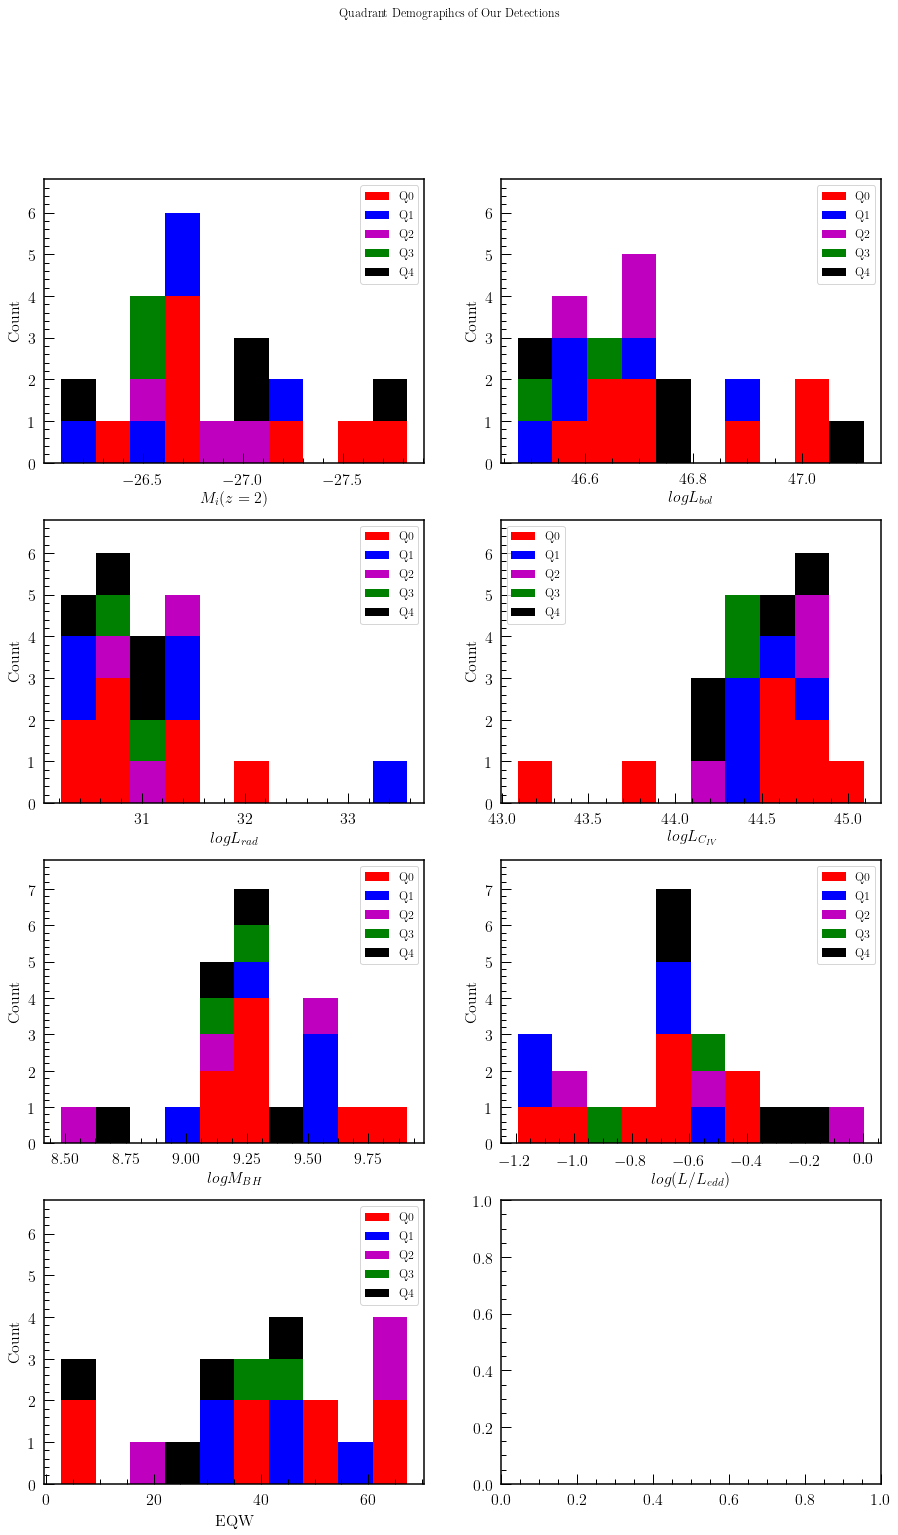

In [256]:
fig, axs = plt.subplots(4, 2, figsize=(15,24))

axs[0,0].hist([Miz2[Q0d], Miz2[Q1d], Miz2[Q2d], Miz2[Q3d], Miz2[Q4d]], color=['r', 'b', 'm', 'g', 'k'], 
                  stacked=True, label=["Q0", "Q1", "Q2", "Q3", "Q4"])
axs[0,0].set_xlabel('$M_i(z=2)$')
axs[0,0].invert_xaxis()
axs[0,0].set_ylabel('Count')
axs[0,0].set_ylim(0, 6.8)
axs[0,0].legend(loc="best")

axs[0,1].hist([logL_bol[Q0d], logL_bol[Q1d], logL_bol[Q2d], logL_bol[Q3d], logL_bol[Q4d]], color=['r', 'b', 'm', 'g', 'k'], 
                  stacked=True, label=["Q0", "Q1", "Q2", "Q3", "Q4"])
axs[0,1].set_xlabel('$log L_{bol}$')
axs[0,1].set_ylabel('Count')
axs[0,1].set_ylim(0, 6.8)
axs[0,1].legend(loc="best")

axs[1,0].hist([logL_rad[Q0d], logL_rad[Q1d], logL_rad[Q2d], logL_rad[Q3d], logL_rad[Q4d]], color=['r', 'b', 'm', 'g', 'k'], 
                  stacked=True, label=["Q0", "Q1", "Q2", "Q3", "Q4"])
axs[1,0].set_xlabel('$log L_{rad}$')
axs[1,0].set_ylabel('Count')
axs[1,0].set_ylim(0, 6.8)
axs[1,0].legend(loc="best")

axs[1,1].hist([logL_civ[Q0d], logL_civ[Q1d], logL_civ[Q2d], logL_civ[Q3d], logL_civ[Q4d]], color=['r', 'b', 'm', 'g', 'k'], 
                  stacked=True, label=["Q0", "Q1", "Q2", "Q3", "Q4"])
axs[1,1].set_xlabel('$log L_{C_{IV}}$')
axs[1,1].set_ylabel('Count')
axs[1,1].set_ylim(0, 6.8)
axs[1,1].legend(loc="best")

axs[2,0].hist([log_bh[Q0d], log_bh[Q1d], log_bh[Q2d], log_bh[Q3d], log_bh[Q4d]], color=['r', 'b', 'm', 'g', 'k'], 
                  stacked=True, label=["Q0", "Q1", "Q2", "Q3", "Q4"])
axs[2,0].set_xlabel('$log M_{BH}$')
axs[2,0].set_ylabel('Count')
axs[2,0].set_ylim(0, 7.8)
axs[2,0].legend(loc="best")

axs[2,1].hist([logedd_ratio[Q0d], logedd_ratio[Q1d], logedd_ratio[Q2d], logedd_ratio[Q3d], logedd_ratio[Q4d]], color=['r', 'b', 'm', 'g', 'k'], 
                  stacked=True, label=["Q0", "Q1", "Q2", "Q3", "Q4"])
axs[2,1].set_xlabel('$log (L/L_{edd})$')
axs[2,1].set_ylabel('Count')
axs[2,1].set_ylim(0, 7.8)
axs[2,1].legend(loc="best")

axs[3,0].hist([ew_civ[Q0d], ew_civ[Q1d], ew_civ[Q2d], ew_civ[Q3d], ew_civ[Q4d]], color=['r', 'b', 'm', 'g', 'k'], 
                  stacked=True, label=["Q0", "Q1", "Q2", "Q3", "Q4"])
axs[3,0].set_xlabel('EQW')
axs[3,0].set_ylabel('Count')
axs[3,0].set_ylim(0, 6.8)
axs[3,0].legend(loc="best")

plt.suptitle('Quadrant Demograpihcs of Our Detections')
#plt.savefig("Graphs/ICA_Ordering/quadrants_detection_demographics.png")

---

#### Now Compare RL detections and RQ detections "separately"

In [264]:
#Can change radio-loudness indicator below:

#Flux/Luminosity as RL parameter
#RQ = ((10.**int_flux)<229)&(det>0) #229µJy = 10^23.3 W/Hz, which is radio-loud using 
#RL = ((10.**int_flux)>229)&(det>0)

##alpha_ro as RL parameter
RQ = (aro>-0.2)&(det>0) #alpha_ro<-0.2 is radio-loud 
RL = (aro<-0.2)&(det>0)

Q0_RQ = (Q == 0)&(RQ) #red
Q1_RQ = (Q == 1)&(RQ) #blue
Q2_RQ = (Q == 2)&(RQ) #magenta
Q3_RQ = (Q == 3)&(RQ) #yellow
Q4_RQ = (Q == 4)&(RQ) #black

Q0_RL = (Q == 0)&(RL) 
Q1_RL = (Q == 1)&(RL) 
Q2_RL = (Q == 2)&(RL) 
Q3_RL = (Q == 3)&(RL) 
Q4_RL = (Q == 4)&(RL)

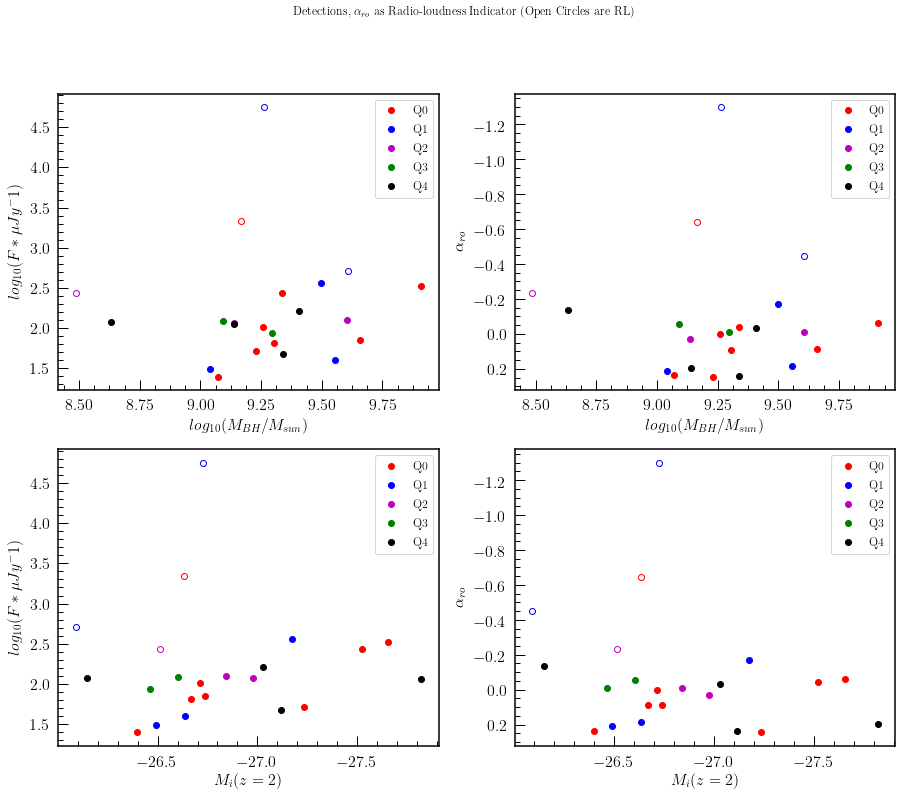

In [269]:
fig, axs = plt.subplots(2, 2, figsize=(15,12))

axs[0,0].plot(log_bh[Q0_RQ], int_flux[Q0_RQ], 'ro', label="Q0")
axs[0,0].plot(log_bh[Q0_RL], int_flux[Q0_RL], 'ro', markerfacecolor="None")
axs[0,0].plot(log_bh[Q1_RQ], int_flux[Q1_RQ], 'bo', label="Q1")
axs[0,0].plot(log_bh[Q1_RL], int_flux[Q1_RL], 'bo', markerfacecolor="None")
axs[0,0].plot(log_bh[Q2_RQ], int_flux[Q2_RQ], 'mo', label="Q2")
axs[0,0].plot(log_bh[Q2_RL], int_flux[Q2_RL], 'mo', markerfacecolor="None")
axs[0,0].plot(log_bh[Q3_RQ], int_flux[Q3_RQ], 'go', label="Q3")
axs[0,0].plot(log_bh[Q3_RL], int_flux[Q3_RL], 'go', markerfacecolor="None")
axs[0,0].plot(log_bh[Q4_RQ], int_flux[Q4_RQ], 'ko', label="Q4")
axs[0,0].plot(log_bh[Q4_RL], int_flux[Q4_RL], 'ko', markerfacecolor="None")
#axs[0,0].set_ylim(1,3)
axs[0,0].set_xlabel("$log_{10} (M_{BH} / M_{sun})$")
axs[0,0].set_ylabel('$log_{10} (F * {\mu Jy}^-1)$')
axs[0,0].legend(loc="best")

axs[0,1].plot(log_bh[Q0_RQ], aro[Q0_RQ], 'ro', label="Q0")
axs[0,1].plot(log_bh[Q0_RL], aro[Q0_RL], 'ro', markerfacecolor="None")
axs[0,1].plot(log_bh[Q1_RQ], aro[Q1_RQ], 'bo', label="Q1")
axs[0,1].plot(log_bh[Q1_RL], aro[Q1_RL], 'bo', markerfacecolor="None")
axs[0,1].plot(log_bh[Q2_RQ], aro[Q2_RQ], 'mo', label="Q2")
axs[0,1].plot(log_bh[Q2_RL], aro[Q2_RL], 'mo', markerfacecolor="None")
axs[0,1].plot(log_bh[Q3_RQ], aro[Q3_RQ], 'go', label="Q3")
axs[0,1].plot(log_bh[Q3_RL], aro[Q3_RL], 'go', markerfacecolor="None")
axs[0,1].plot(log_bh[Q4_RQ], aro[Q4_RQ], 'ko', label="Q4")
axs[0,1].plot(log_bh[Q4_RL], aro[Q4_RL], 'ko', markerfacecolor="None")
#axs[0,1].set_ylim(1,3)
axs[0,1].set_xlabel("$log_{10} (M_{BH} / M_{sun})$")
axs[0,1].set_ylabel('$\\alpha_{ro}$')
axs[0,1].invert_yaxis()
axs[0,1].legend(loc="best")

axs[1,0].plot(Miz2[Q0_RQ], int_flux[Q0_RQ], 'ro', label="Q0")
axs[1,0].plot(Miz2[Q0_RL], int_flux[Q0_RL], 'ro', markerfacecolor="None")
axs[1,0].plot(Miz2[Q1_RQ], int_flux[Q1_RQ], 'bo', label="Q1")
axs[1,0].plot(Miz2[Q1_RL], int_flux[Q1_RL], 'bo', markerfacecolor="None")
axs[1,0].plot(Miz2[Q2_RQ], int_flux[Q2_RQ], 'mo', label="Q2")
axs[1,0].plot(Miz2[Q2_RL], int_flux[Q2_RL], 'mo', markerfacecolor="None")
axs[1,0].plot(Miz2[Q3_RQ], int_flux[Q3_RQ], 'go', label="Q3")
axs[1,0].plot(Miz2[Q3_RL], int_flux[Q3_RL], 'go', markerfacecolor="None")
axs[1,0].plot(Miz2[Q4_RQ], int_flux[Q4_RQ], 'ko', label="Q4")
axs[1,0].plot(Miz2[Q4_RL], int_flux[Q4_RL], 'ko', markerfacecolor="None")
#axs[1,0].set_ylim(1,3)
axs[1,0].set_xlabel("$M_i(z=2)$")
axs[1,0].set_ylabel('$log_{10} (F * {\mu Jy}^-1)$')
axs[1,0].invert_xaxis()
axs[1,0].legend(loc="best")

axs[1,1].plot(Miz2[Q0_RQ], aro[Q0_RQ], 'ro', label="Q0")
axs[1,1].plot(Miz2[Q0_RL], aro[Q0_RL], 'ro', markerfacecolor="None")
axs[1,1].plot(Miz2[Q1_RQ], aro[Q1_RQ], 'bo', label="Q1")
axs[1,1].plot(Miz2[Q1_RL], aro[Q1_RL], 'bo', markerfacecolor="None")
axs[1,1].plot(Miz2[Q2_RQ], aro[Q2_RQ], 'mo', label="Q2")
axs[1,1].plot(Miz2[Q2_RL], aro[Q2_RL], 'mo', markerfacecolor="None")
axs[1,1].plot(Miz2[Q3_RQ], aro[Q3_RQ], 'go', label="Q3")
axs[1,1].plot(Miz2[Q3_RL], aro[Q3_RL], 'go', markerfacecolor="None")
axs[1,1].plot(Miz2[Q4_RQ], aro[Q4_RQ], 'ko', label="Q4")
axs[1,1].plot(Miz2[Q4_RL], aro[Q4_RL], 'ko', markerfacecolor="None")
#axs[1,1].set_ylim(1,3)
axs[1,1].set_xlabel("$M_i(z=2)$")
axs[1,1].set_ylabel('$\\alpha_{ro}$')
axs[1,1].invert_xaxis()
axs[1,1].invert_yaxis()
axs[1,1].legend(loc="best")

plt.suptitle("Detections, $\\alpha_{ro}$ as Radio-loudness Indicator (Open Circles are RL)")
#plt.savefig("Graphs/ICA_Ordering/quadrants_radio_vs_bhmass_and_mag_RL_vs_RQ_alpharo.png")

Open points are RL detections

---

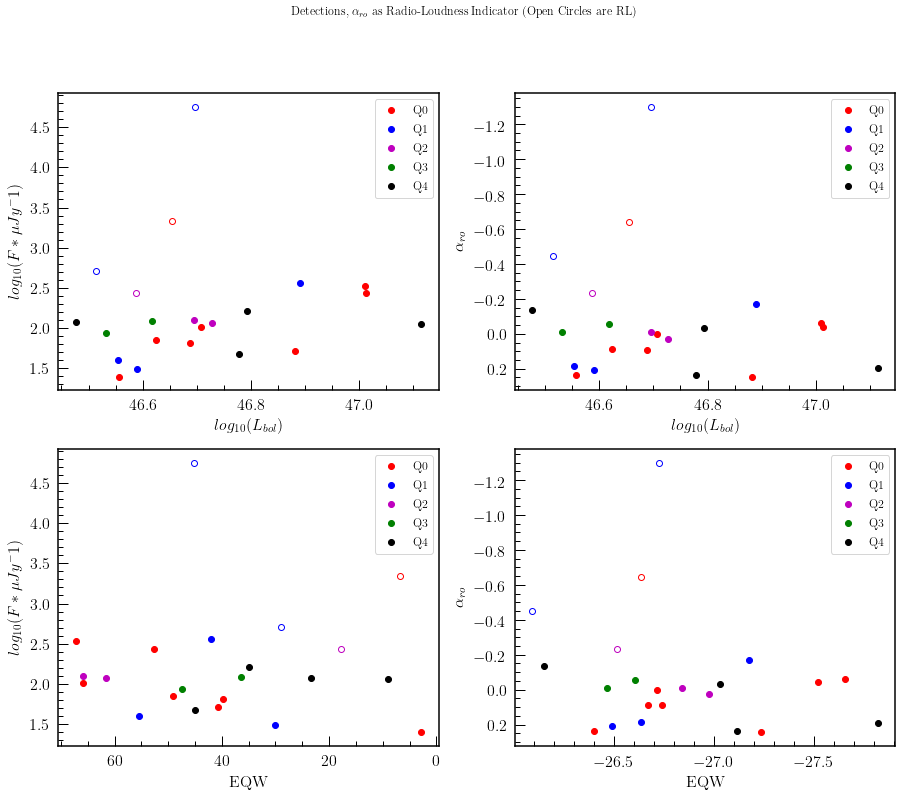

In [270]:
fig, axs = plt.subplots(2, 2, figsize=(15,12))

axs[0,0].plot(logL_bol[Q0_RQ], int_flux[Q0_RQ], 'ro', label="Q0")
axs[0,0].plot(logL_bol[Q0_RL], int_flux[Q0_RL], 'ro', markerfacecolor="None")
axs[0,0].plot(logL_bol[Q1_RQ], int_flux[Q1_RQ], 'bo', label="Q1")
axs[0,0].plot(logL_bol[Q1_RL], int_flux[Q1_RL], 'bo', markerfacecolor="None")
axs[0,0].plot(logL_bol[Q2_RQ], int_flux[Q2_RQ], 'mo', label="Q2")
axs[0,0].plot(logL_bol[Q2_RL], int_flux[Q2_RL], 'mo', markerfacecolor="None")
axs[0,0].plot(logL_bol[Q3_RQ], int_flux[Q3_RQ], 'go', label="Q3")
axs[0,0].plot(logL_bol[Q3_RL], int_flux[Q3_RL], 'go', markerfacecolor="None")
axs[0,0].plot(logL_bol[Q4_RQ], int_flux[Q4_RQ], 'ko', label="Q4")
axs[0,0].plot(logL_bol[Q4_RL], int_flux[Q4_RL], 'ko', markerfacecolor="None")
#axs[0,0].set_ylim(1,3)
axs[0,0].set_xlabel("$log_{10} (L_{bol})$")
axs[0,0].set_ylabel('$log_{10} (F * {\mu Jy}^-1)$')
axs[0,0].legend(loc="best")

axs[0,1].plot(logL_bol[Q0_RQ], aro[Q0_RQ], 'ro', label="Q0")
axs[0,1].plot(logL_bol[Q0_RL], aro[Q0_RL], 'ro', markerfacecolor="None")
axs[0,1].plot(logL_bol[Q1_RQ], aro[Q1_RQ], 'bo', label="Q1")
axs[0,1].plot(logL_bol[Q1_RL], aro[Q1_RL], 'bo', markerfacecolor="None")
axs[0,1].plot(logL_bol[Q2_RQ], aro[Q2_RQ], 'mo', label="Q2")
axs[0,1].plot(logL_bol[Q2_RL], aro[Q2_RL], 'mo', markerfacecolor="None")
axs[0,1].plot(logL_bol[Q3_RQ], aro[Q3_RQ], 'go', label="Q3")
axs[0,1].plot(logL_bol[Q3_RL], aro[Q3_RL], 'go', markerfacecolor="None")
axs[0,1].plot(logL_bol[Q4_RQ], aro[Q4_RQ], 'ko', label="Q4")
axs[0,1].plot(logL_bol[Q4_RL], aro[Q4_RL], 'ko', markerfacecolor="None")
#axs[0,1].set_ylim(1,3)
axs[0,1].set_xlabel("$log_{10} (L_{bol})$")
axs[0,1].set_ylabel('$\\alpha_{ro}$')
axs[0,1].invert_yaxis()
axs[0,1].legend(loc="best")

axs[1,0].plot(ew_civ[Q0_RQ], int_flux[Q0_RQ], 'ro', label="Q0")
axs[1,0].plot(ew_civ[Q0_RL], int_flux[Q0_RL], 'ro', markerfacecolor="None")
axs[1,0].plot(ew_civ[Q1_RQ], int_flux[Q1_RQ], 'bo', label="Q1")
axs[1,0].plot(ew_civ[Q1_RL], int_flux[Q1_RL], 'bo', markerfacecolor="None")
axs[1,0].plot(ew_civ[Q2_RQ], int_flux[Q2_RQ], 'mo', label="Q2")
axs[1,0].plot(ew_civ[Q2_RL], int_flux[Q2_RL], 'mo', markerfacecolor="None")
axs[1,0].plot(ew_civ[Q3_RQ], int_flux[Q3_RQ], 'go', label="Q3")
axs[1,0].plot(ew_civ[Q3_RL], int_flux[Q3_RL], 'go', markerfacecolor="None")
axs[1,0].plot(ew_civ[Q4_RQ], int_flux[Q4_RQ], 'ko', label="Q4")
axs[1,0].plot(ew_civ[Q4_RL], int_flux[Q4_RL], 'ko', markerfacecolor="None")
#axs[1,0].set_ylim(1,3)
axs[1,0].set_xlabel("EQW")
axs[1,0].set_ylabel('$log_{10} (F * {\mu Jy}^-1)$')
axs[1,0].invert_xaxis()
axs[1,0].legend(loc="best")

axs[1,1].plot(Miz2[Q0_RQ], aro[Q0_RQ], 'ro', label="Q0")
axs[1,1].plot(Miz2[Q0_RL], aro[Q0_RL], 'ro', markerfacecolor="None")
axs[1,1].plot(Miz2[Q1_RQ], aro[Q1_RQ], 'bo', label="Q1")
axs[1,1].plot(Miz2[Q1_RL], aro[Q1_RL], 'bo', markerfacecolor="None")
axs[1,1].plot(Miz2[Q2_RQ], aro[Q2_RQ], 'mo', label="Q2")
axs[1,1].plot(Miz2[Q2_RL], aro[Q2_RL], 'mo', markerfacecolor="None")
axs[1,1].plot(Miz2[Q3_RQ], aro[Q3_RQ], 'go', label="Q3")
axs[1,1].plot(Miz2[Q3_RL], aro[Q3_RL], 'go', markerfacecolor="None")
axs[1,1].plot(Miz2[Q4_RQ], aro[Q4_RQ], 'ko', label="Q4")
axs[1,1].plot(Miz2[Q4_RL], aro[Q4_RL], 'ko', markerfacecolor="None")
#axs[1,1].set_ylim(1,3)
axs[1,1].set_xlabel("EQW")
axs[1,1].set_ylabel('$\\alpha_{ro}$')
axs[1,1].invert_xaxis()
axs[1,1].invert_yaxis()
axs[1,1].legend(loc="best")

plt.suptitle("Detections, $\\alpha_{ro}$ as Radio-Loudness Indicator (Open Circles are RL)")
#plt.savefig("Graphs/ICA_Ordering/quadrants_radio_vs_Lbol_and_EQW_RL_vs_RQ_alpharo.png")

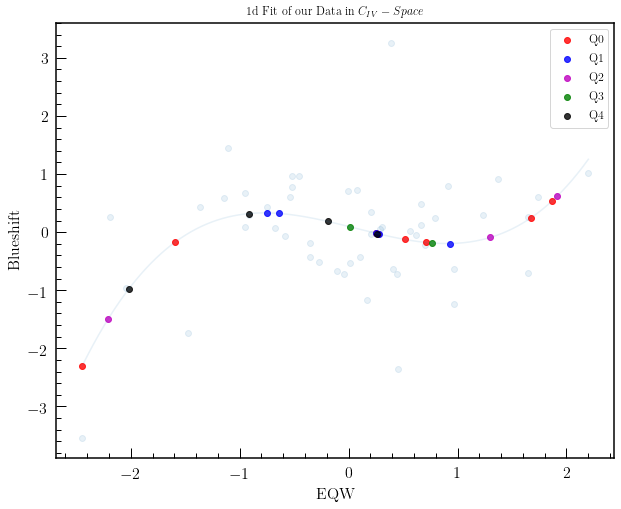

In [263]:
fill = 0.8
plt.figure(figsize=(10,8))
plt.scatter(x, y, alpha=0.1)
plt.plot(fitx[Q0_RQ|Q0_RL], fity[Q0_RQ|Q0_RL], 'ro', label="Q0", alpha=fill)
plt.plot(fitx[Q1_RQ|Q1_RL], fity[Q1_RQ|Q1_RL], 'bo', label="Q1", alpha=fill)
plt.plot(fitx[Q2_RQ|Q2_RL], fity[Q2_RQ|Q2_RL], 'mo', label="Q2", alpha=fill)
plt.plot(fitx[Q3_RQ|Q3_RL], fity[Q3_RQ|Q3_RL], 'go', label="Q3", alpha=fill)
plt.plot(fitx[Q4_RQ|Q4_RL], fity[Q4_RQ|Q4_RL], 'ko', label="Q4", alpha=fill)
plt.plot(z, fit(z), alpha=0.1)
plt.xlabel('EQW')
plt.ylabel('Blueshift')
plt.legend(loc="best")

plt.title("1d Fit of our Data in $C_{IV}-Space$")
#plt.savefig("Graphs/ICA_Ordering/quadrants_detections_civ_1dfit.png")